In [103]:
#Importações
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
#import plotly as py
#import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
import os

In [104]:
#leitura dos dados
vg = pd.read_csv('vgsales.csv');
vg.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [105]:
#Observa-se que Ano, Publicadora possuem elementos nulos.
print("############# TIPOS DE DADOS #############")
vg.info()

############# TIPOS DE DADOS #############
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [106]:
#O número de campos nulos por coluna é:
print("############# NULOS POR COLUNA #############")
vg.isnull().sum()

############# NULOS POR COLUNA #############


Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [107]:
#Remoção de duplicatas caso haja.
predropado = len(vg)
aposdropado = len(vg.drop_duplicates())
#O numero de linhas se manteve, não há duplicatas.
print("%i == %i - nao houveram duplicatas completas, ou seja, todos os atributos iguais." % (predropado, aposdropado))

16598 == 16598 - nao houveram duplicatas completas, ou seja, todos os atributos iguais.


In [108]:
#Remocao de colunas nao usadas
vg.drop(columns=['Rank'])

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16593,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [109]:
#remove todos as linhas que possuem campos nulos e atribiu ao mesmo dataframe.
vg.dropna(inplace=True)
print("Total de removidos: ", aposdropado - len(vg))

Total de removidos:  307


In [110]:
#Por questão de consistência, o ano é setado para inteiro.
vg['Year']=vg['Year'].astype(int)
vg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  int32  
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(5), int32(1), int64(1), object(4)
memory usage: 1.4+ MB


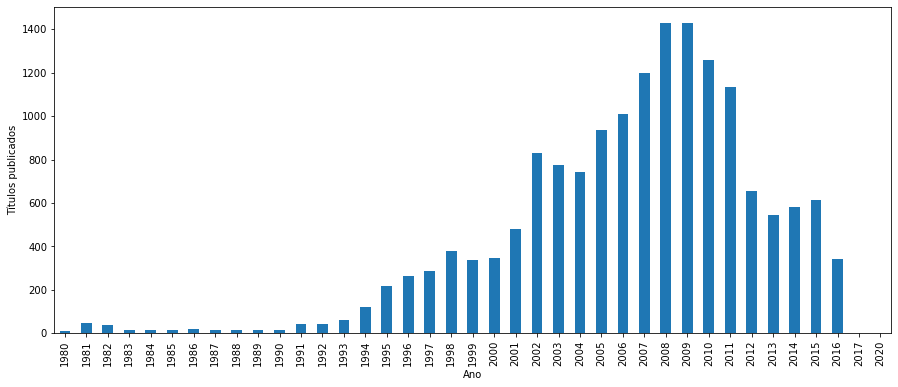

In [111]:
#Podemos checar a densidade de dados em relação a um ano específico para posteriormente comparar com as vendas globais daquele ano.
#Isso trará a noção se ouveram muitos títulos em um certo ano
year_group = vg.pivot_table(columns=['Year'], aggfunc='size')
year_group.plot(kind = 'bar', figsize=(15,6))
plt.xlabel('Ano')
plt.ylabel('Títulos publicados')
plt.show()

In [112]:
#Por falta de dados reais, descarta-se os dados de 2016 pra frente
indexes_todelete = vg.loc[vg['Year']>2016].index #somente 4 indices
vg.drop(indexes_todelete, inplace=True)

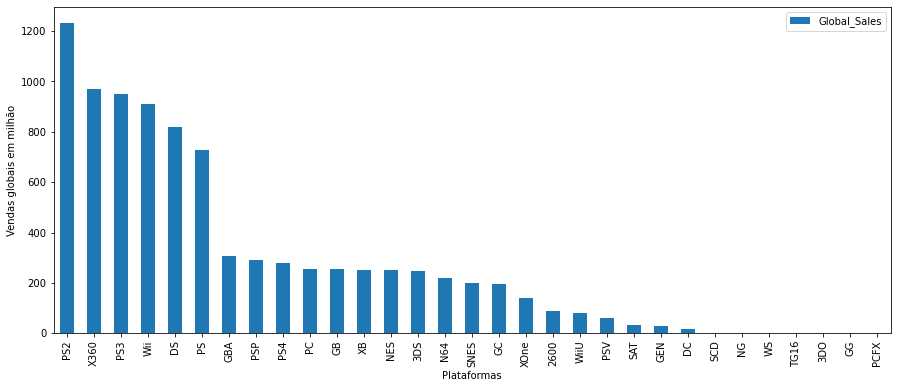

In [113]:
#Utiliza-se pivot_table para criar uma tabela da relação única de plataformas e a soma de venda global de cada jogo daquela plataforma
vg_use = vg.pivot_table ('Global_Sales',index = 'Platform', aggfunc='sum')

#ordena por ordem crescente de global_sales
vg_use_sorted = vg_use.sort_values('Global_Sales', ascending=False)
vg_use_sorted.plot(kind = 'bar', figsize=(15,6))
plt.xlabel('Plataformas')
plt.ylabel('Vendas globais em milhão')
plt.show()

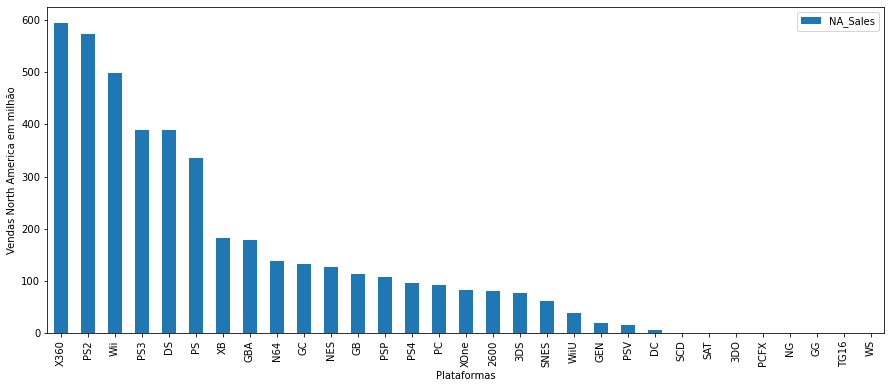

In [114]:
#Utiliza-se pivot_table para criar uma tabela da relação única de plataformas e a soma de venda global de cada jogo daquela plataforma
vg_use = vg.pivot_table ('NA_Sales',index = 'Platform', aggfunc='sum')

#ordena por ordem crescente de global_sales
vg_use_sorted = vg_use.sort_values('NA_Sales', ascending=False)
vg_use_sorted.plot(kind = 'bar', figsize=(15,6))
plt.xlabel('Plataformas')
plt.ylabel('Vendas North America em milhão')
plt.show()

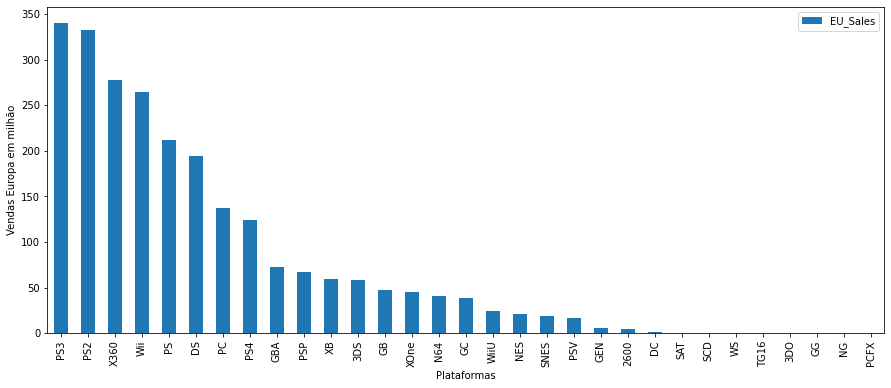

In [115]:
#Utiliza-se pivot_table para criar uma tabela da relação única de plataformas e a soma de venda global de cada jogo daquela plataforma
vg_use = vg.pivot_table ('EU_Sales',index = 'Platform', aggfunc='sum')

#ordena por ordem crescente de global_sales
vg_use_sorted = vg_use.sort_values('EU_Sales', ascending=False)
vg_use_sorted.plot(kind = 'bar', figsize=(15,6))
plt.xlabel('Plataformas')
plt.ylabel('Vendas Europa em milhão')
plt.show()

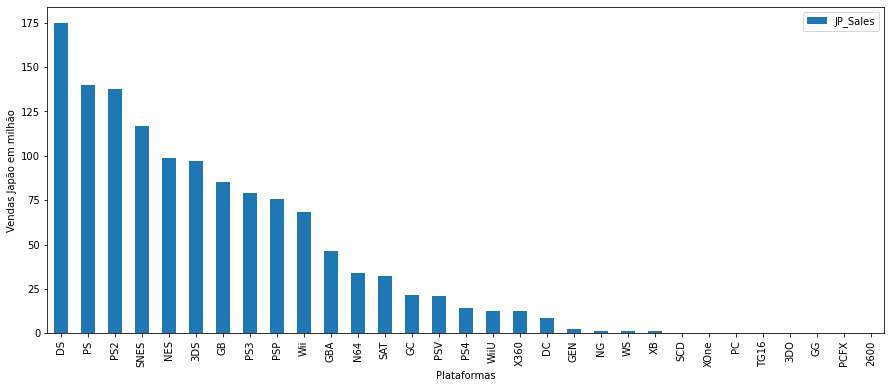

In [116]:
#Utiliza-se pivot_table para criar uma tabela da relação única de plataformas e a soma de venda global de cada jogo daquela plataforma
vg_use = vg.pivot_table ('JP_Sales',index = 'Platform', aggfunc='sum')

#ordena por ordem crescente de global_sales
vg_use_sorted = vg_use.sort_values('JP_Sales', ascending=False)
vg_use_sorted.plot(kind = 'bar', figsize=(15,6))
plt.xlabel('Plataformas')
plt.ylabel('Vendas Japão em milhão')
plt.show()

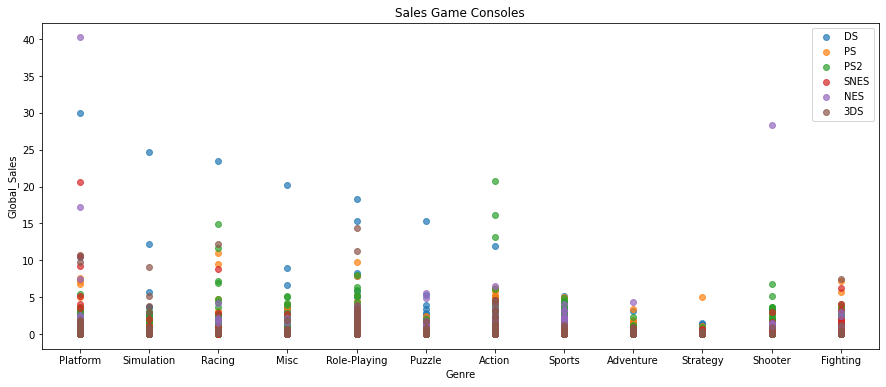

In [117]:
plt.figure(1 , figsize = (15 , 6))

#recupera as 6 primeiras plataformas mais vendidas
plat_mais_vendidas = vg_use_sorted[:6].index

for gender in plat_mais_vendidas:
    plt.scatter(x = 'Genre' , y = 'Global_Sales' , data = vg[vg['Platform'] == gender] ,alpha = 0.7 , label = gender)
plt.xlabel('Genre'), plt.ylabel('Global_Sales') 
plt.title('Sales Game Consoles')
plt.legend()
plt.show()

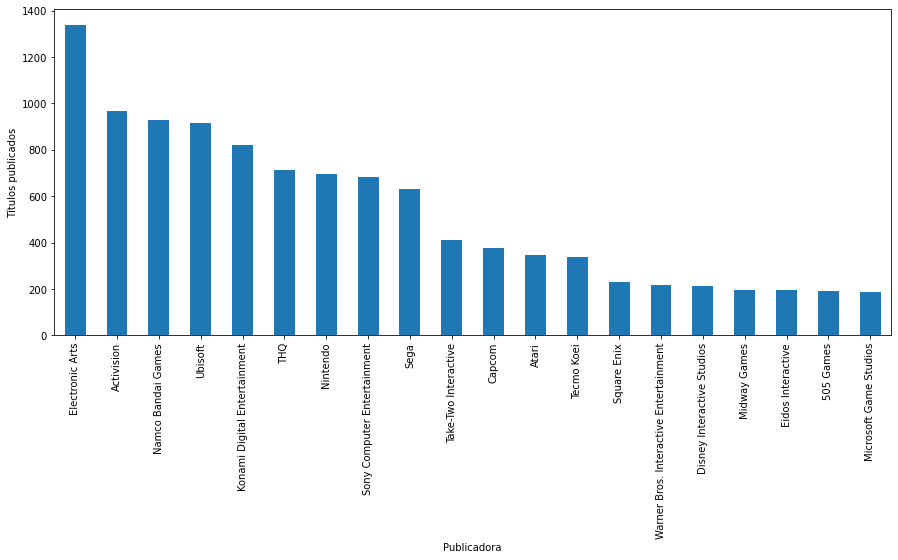

In [118]:
#recupera as 20 maiores publicadoras (depois de contas as ocorrencias)
publicadora_group = vg['Publisher'].value_counts()[:20]
publicadora_group.plot(kind = 'bar', figsize=(15,6))
plt.xlabel('Publicadora')
plt.ylabel('Títulos publicados')
plt.show()

In [140]:
#Devemos notar que a publicação de um título está atrelada a uma plataforma, por isso é possível juntar títulos que tenham
#publicação em multi-plataformas para se obter um dado mais coerente de venda e outros..

#Um nome duplicado, provavelmente se trata de um lançamento multi plataformas
print('Um nome duplicado, provavelmente se trata de um lançamento multi plataformas: ', len(vg[vg[['Name']].duplicated()]))

#Um nome e uma plataforma duplicados, com ano diferente, vendas diferentes, provavelmente se trata de um remake
print('Um nome e uma plataforma duplicados, com ano diferente, vendas diferentes, provavelmente se trata de um remake: ', len(vg[vg[['Name', 'Platform']].duplicated()]))

#Um nome, plataforma e ano duplicados, provavelmente se trata de uma inconsistencia nos dados
print('Um nome, plataforma e ano duplicados, provavelmente se trata de uma inconsistencia nos dados: ', len(vg[vg[['Name', 'Platform', 'Year']].duplicated()]))

vg_global_sorted = vg.sort_values(['Global_Sales'], ascending=False)
provaveis_erros = vg_global_sorted[vg_global_sorted[['Name', 'Platform', 'Year']].duplicated(keep=False)]

print("########################### provaveis erros nos dados ##########################")
print(provaveis_erros)

#pega todos os provaveis erros repetidos, menos o primeiro que é o com mais vendas, logo, remove
vg_global_sorted.drop(provaveis_erros[1:].index, inplace=True)
vg_global_sorted.loc[vg['Name']=='Madden NFL 13'] #confirmação da remoção de um caso.


Um nome duplicado, provavelmente se trata de um lançamento multi plataformas:  4965
Um nome e uma plataforma duplicados, com ano diferente, vendas diferentes, provavelmente se trata de um remake:  3
Um nome, plataforma e ano duplicados, provavelmente se trata de uma inconsistencia nos dados:  1
########################### provaveis erros nos dados ##########################
        Rank           Name Platform  Year   Genre        Publisher  NA_Sales  \
603      604  Madden NFL 13      PS3  2012  Sports  Electronic Arts      2.11   
16127  16130  Madden NFL 13      PS3  2012  Sports  Electronic Arts      0.00   

       EU_Sales  JP_Sales  Other_Sales  Global_Sales  
603        0.23       0.0         0.22          2.56  
16127      0.01       0.0         0.00          0.01  


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
506,507,Madden NFL 13,X360,2012,Sports,Electronic Arts,2.53,0.16,0.0,0.17,2.86
603,604,Madden NFL 13,PS3,2012,Sports,Electronic Arts,2.11,0.23,0.0,0.22,2.56
3730,3732,Madden NFL 13,Wii,2012,Sports,Electronic Arts,0.51,0.00,0.0,0.03,0.54
5588,5590,Madden NFL 13,PSV,2012,Sports,Electronic Arts,0.30,0.00,0.0,0.03,0.32
6792,6794,Madden NFL 13,WiiU,2012,Sports,Electronic Arts,0.22,0.00,0.0,0.02,0.24


In [164]:
#agrupa e soma pra eliminar a distribuição das vendas entre plataformas
# e logo ordena
group_bynames = vg_global_sorted.groupby(['Name']).sum().sort_values(['Global_Sales'], ascending=False)

#remove as colunas Rank e Year pois a soma não interessa
group_bynames.drop(['Rank', 'Year'], axis=1, inplace=True)
group_bynames.head(15)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Name,,,,,
Wii Sports,41.49,29.02,3.77,8.46,82.74
Grand Theft Auto V,23.46,23.04,1.39,8.03,55.92
Super Mario Bros.,32.48,4.88,6.96,0.99,45.31
Tetris,26.17,2.95,6.03,0.69,35.84
Mario Kart Wii,15.85,12.88,3.79,3.31,35.82
Wii Sports Resort,15.75,11.01,3.28,2.96,33.00
Pokemon Red/Pokemon Blue,11.27,8.89,10.22,1.00,31.37
Call of Duty: Modern Warfare 3,15.58,11.29,0.62,3.35,30.83
New Super Mario Bros.,11.38,9.23,6.50,2.90,30.01


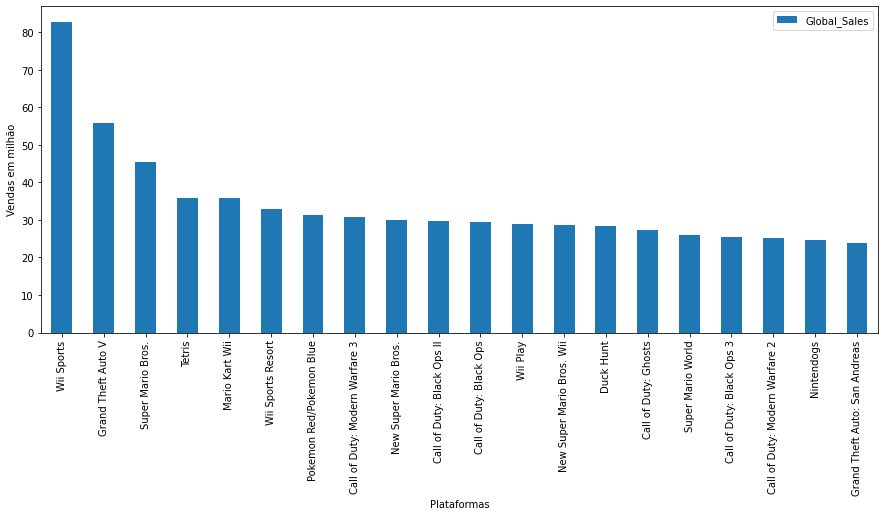

In [169]:
#cria pivot table de global sales com os nomes e seleciona os 20 primeiros

title_sells = group_bynames.pivot_table ('Global_Sales',index = 'Name')
title_sells = title_sells.sort_values(['Global_Sales'], ascending=False)[:20]
title_sells.plot(kind = 'bar', figsize=(15,6))
plt.xlabel('Plataformas')
plt.ylabel('Vendas em milhão')
plt.show()

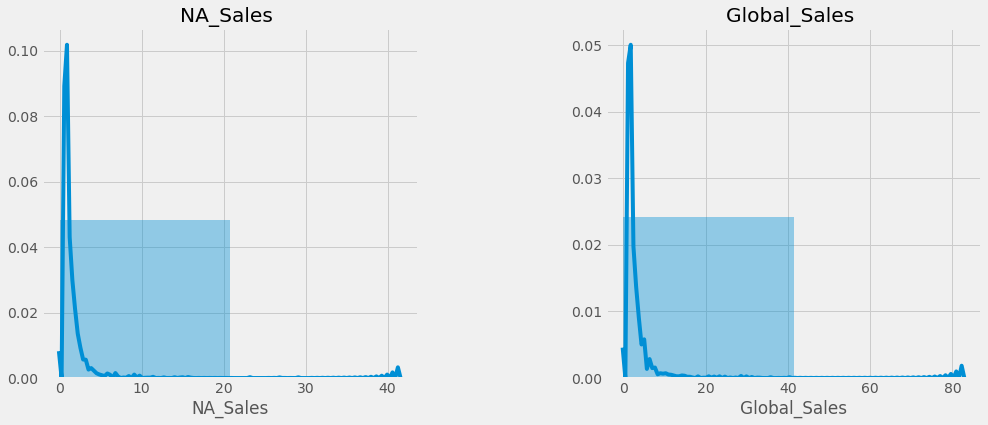

In [224]:
plt.style.use('fivethirtyeight')

plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['NA_Sales' , 'Global_Sales']:
    n += 1
    plt.subplot(1 , 2 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(vg[x] , bins = 2)
    plt.title('{} '.format(x))
plt.show()

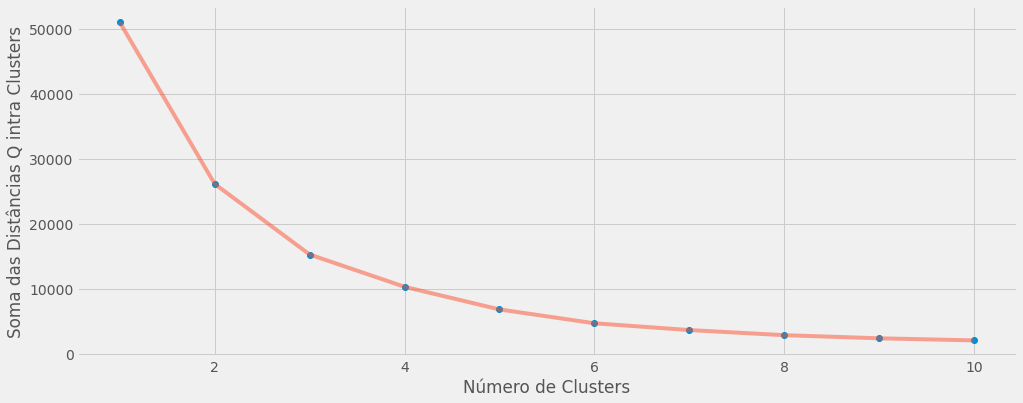

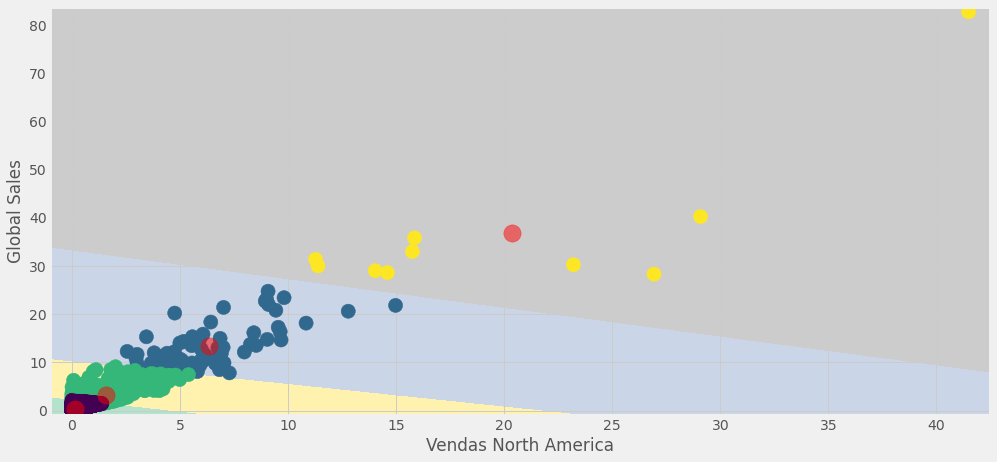

In [254]:
X2 = vg[['NA_Sales' , 'Global_Sales' ]].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n))
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)
    plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Número de Clusters') , plt.ylabel('Soma das Distâncias Q intra Clusters')
plt.show()

algorithm = (KMeans(n_clusters = 4))
algorithm.fit(X2)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, tol=0.0001, verbose=0)

labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z2 = Z.reshape(xx.shape)
plt.imshow(Z2 , interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')
plt.scatter( x = 'NA_Sales' ,y = 'Global_Sales' , data = vg , c = labels2 , s = 200 )
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Global Sales') , plt.xlabel('Vendas North America')
plt.show()